# Which Isotope should I weigh Next?

### -Pablo Giuliani, Rahul Jain

The purpose of this challenge is to determine which isotope should you select for your next mass measurement that will yield maximum returns given limited resources. We will roughly try to reproduce the results of this paper https://arxiv.org/pdf/2111.11536.pdf, albeit with some approximations. 

Your tasks will be to:

 - Read in theoretical predictions for nuclear masses with uncertainties. 
 - Estimate the expected experimental uncertainties given the beam-rates at FRIB. 
 - Design metrics to determine which mass measurement will be the most impactful. 
 - Identify how the different assumptions and prior informations affect your final results.

Note: We will make a number of assumptions through this notebook, which can be refined for a more realistic analysis, but this toy problem, nonetheless, should serve as a good starting point. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The theoretical predictions are averaged over 11 theoretical mass models listed below (with their references):

 - SkM* - https://www.sciencedirect.com/science/article/pii/0375947482904031?via%3Dihub 
 - SkP - https://www.sciencedirect.com/science/article/pii/0375947484904330?via%3Dihub
 - SLy4 - https://iopscience.iop.org/article/10.1088/0031-8949/1995/T56/034 
 - SV-min - https://journals.aps.org/prc/abstract/10.1103/PhysRevC.79.034310 
 - UNEDF1 - https://journals.aps.org/prc/abstract/10.1103/PhysRevC.85.024304 
 - UNEDF2 - https://journals.aps.org/prc/abstract/10.1103/PhysRevC.89.054314 
 - BCPM - https://journals.aps.org/prc/abstract/10.1103/PhysRevC.87.064305 
 - D1M - https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.102.242501 
 - FRDM2012 - https://www.sciencedirect.com/science/article/pii/S0092640X1600005X?via%3Dihub 
 - HFB24 - https://journals.aps.org/prc/abstract/10.1103/PhysRevC.88.024308
    
And their uncertainties are just the standard deviations for the above set of models. 

In [2]:
# Read in theoretical nuclear masses as Total Binding Energies in MeV
# Or use your model predictions and uncertainties from your Bayesian Calibration of Liquid Drop Model

theory = pd.read_csv('BE_theory.csv')

In [3]:
theory

,Z,N,BE,BE_sd
0,8,8,126.730264,2.684685
1,8,9,131.736614,2.781418
2,8,10,141.130287,3.120406
3,8,11,145.124246,3.165602
4,8,12,153.206220,3.364174
5,8,13,156.250899,3.509494
6,8,14,163.229197,3.884876
7,8,15,165.093580,3.949616
8,8,16,170.008213,4.476579
9,8,17,169.107024,4.654017


In [4]:
# Read in FRIB Beam Rates (in particles per second or pps) that will determine the statistical uncertainty on our measurement
# Higher the beam-rate, lesser the statistical uncertainty and vice versa

frib_rates = pd.read_csv('frib_rates.csv')

In [5]:
frib_rates

,N,Z,rate
0,0,1,7.290000e+09
1,1,1,6.350000e+10
2,2,1,5.410000e+10
3,1,2,6.880000e+10
4,2,2,2.200000e+11
5,4,2,3.980000e+10
6,6,2,6.250000e+08
7,3,3,5.120000e+11
8,4,3,3.390000e+11
9,5,3,9.790000e+10


In [6]:
# Merge these datasets

isotopes = theory.merge(frib_rates,on=['Z','N'],how='inner')

In [7]:
isotopes

,Z,N,BE,BE_sd,rate
0,8,8,126.730264,2.684685,3.320000e+14
1,8,9,131.736614,2.781418,6.280000e+12
2,8,10,141.130287,3.120406,3.320000e+14
3,8,11,145.124246,3.165602,6.700000e+11
4,8,12,153.206220,3.364174,1.800000e+11
5,8,13,156.250899,3.509494,1.860000e+09
6,8,14,163.229197,3.884876,7.100000e+07
7,8,15,165.093580,3.949616,5.500000e+06
8,8,16,170.008213,4.476579,4.360000e+05
9,9,8,128.192964,2.839719,1.580000e+12


Now we estimate the expected statistical uncertainty. Here, we only consider Penning Trap Mass Measurements (PTM) https://en.wikipedia.org/wiki/Penning_trap since these are usually high precision. 

The relative systematic uncertainty $(\delta m / m |_{sys})$ is about $10^{-8}$. This is the typical precision of the reference ions used. Actual number will depend on exact reference isotope. 

The relative statistic uncertainty $(\delta m / m |_{stat})$ is about $R^{-1}n^{-1/2}$, where $R = 10^{5}$ is the approximate resolving power for the trap at FRIB, and n is the **stopped** beam rate (in pps). 

The rates above are the fast-beam rates produced by FRIB. But these particles need to be stopped in order for them to be successfully trapped. The stopping efficiency further depends on a number of factors, but here, we can use a flat efficiency of $10^{-5}$, i.e. 1 in every $10^{5}$ isotopes produced is successfully trapped. 

In [8]:
R = 1e5

isotopes['dm_m_sys'] = 1e-8
isotopes['dm_m_stat'] = 1/(R*np.sqrt(1e-5*isotopes['rate']))

# Calculate the Total Uncertainty
isotopes['dm_m_total'] = np.sqrt(isotopes['dm_m_sys']**2 + isotopes['dm_m_stat']**2)

# Calculate Mass of the nucleus from BE to get the absolute uncertainty
mp = 938.27 # Mass of proton in MeV
mn = 939.565 # Mass of neutron in MeV

isotopes['expt_sd'] = (isotopes['Z']*mp + isotopes['N']*mn - isotopes['BE'])*isotopes['dm_m_total']

In [9]:
isotopes

,Z,N,BE,BE_sd,rate,dm_m_sys,dm_m_stat,dm_m_total,expt_sd
0,8,8,126.730264,2.684685,3.320000e+14,1.000000e-08,1.735525e-10,1.000151e-08,0.000149
1,8,9,131.736614,2.781418,6.280000e+12,1.000000e-08,1.261886e-09,1.007930e-08,0.000160
2,8,10,141.130287,3.120406,3.320000e+14,1.000000e-08,1.735525e-10,1.000151e-08,0.000168
3,8,11,145.124246,3.165602,6.700000e+11,1.000000e-08,3.863337e-09,1.072033e-08,0.000190
4,8,12,153.206220,3.364174,1.800000e+11,1.000000e-08,7.453560e-09,1.247219e-08,0.000232
5,8,13,156.250899,3.509494,1.860000e+09,1.000000e-08,7.332356e-08,7.400232e-08,0.001448
6,8,14,163.229197,3.884876,7.100000e+07,1.000000e-08,3.752933e-07,3.754265e-07,0.007695
7,8,15,165.093580,3.949616,5.500000e+06,1.000000e-08,1.348400e-06,1.348437e-06,0.028903
8,8,16,170.008213,4.476579,4.360000e+05,1.000000e-08,4.789131e-06,4.789142e-06,0.107129
9,9,8,128.192964,2.839719,1.580000e+12,1.000000e-08,2.515773e-09,1.031160e-08,0.000163


In [10]:
# Plotting utility function that takes in a DataFrame and the column name to be plotted

def plot_nuclear(df,col):
    fig = plt.figure()
    ax = plt.axes()
    fig.patch.set_facecolor('white')
    fig.set_dpi(150)
    s = ax.scatter(df['Z'],df['N'],c=np.log(df[col]),marker='s',label='log '+col+('  (in MeV)'))
    ax.set_xlabel('Z  Protons')
    ax.set_ylabel('N Neutrons')
    ax.legend()
    fig.colorbar(s, ax=ax)
    plt.show()

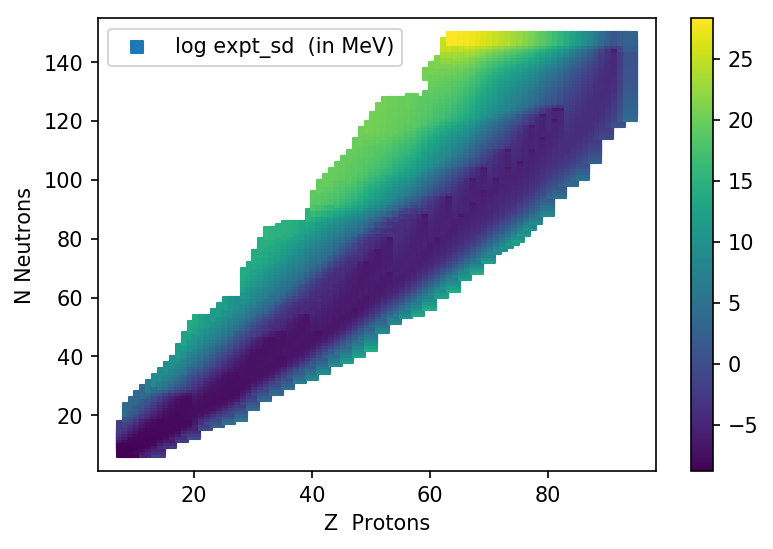

In [11]:
plot_nuclear(isotopes, 'expt_sd')

Next, we define a criteria for impact. The best case would be an isotope that has the largest uncertainty in theoretical predictions and the smallest uncertainty in experimental predictions. 

So, A simple metric could be $m_1 = \delta m_{theoretical} / \delta m_{experimental} $ which should be large.  

In [12]:
isotopes['m1'] = isotopes['BE_sd']/isotopes['expt_sd']

In [13]:
isotopes.sort_values(by='m1',ascending=False).head(10)

,Z,N,BE,BE_sd,rate,dm_m_sys,dm_m_stat,dm_m_total,expt_sd,m1
2,8,10,141.130287,3.120406,3.320000e+14,1.000000e-08,1.735525e-10,1.000151e-08,0.000168,18614.617070
0,8,8,126.730264,2.684685,3.320000e+14,1.000000e-08,1.735525e-10,1.000151e-08,0.000149,18020.206499
1,8,9,131.736614,2.781418,6.280000e+12,1.000000e-08,1.261886e-09,1.007930e-08,0.000160,17431.744191
9,9,8,128.192964,2.839719,1.580000e+12,1.000000e-08,2.515773e-09,1.031160e-08,0.000163,17393.728578
24,10,10,157.794528,3.125579,2.750000e+14,1.000000e-08,1.906925e-10,1.000182e-08,0.000186,16782.588187
3,8,11,145.124246,3.165602,6.700000e+11,1.000000e-08,3.863337e-09,1.072033e-08,0.000190,16686.570787
10,9,9,135.628717,2.691217,4.730000e+12,1.000000e-08,1.454017e-09,1.010516e-08,0.000169,15885.654896
22,10,8,133.936730,3.075146,2.550000e+11,1.000000e-08,6.262243e-09,1.179897e-08,0.000198,15545.715595
11,9,10,146.988864,2.776319,3.710000e+12,1.000000e-08,1.641773e-09,1.013387e-08,0.000179,15484.250247
13,9,12,162.992259,3.034940,1.660000e+12,1.000000e-08,2.454403e-09,1.029680e-08,0.000201,15071.724427


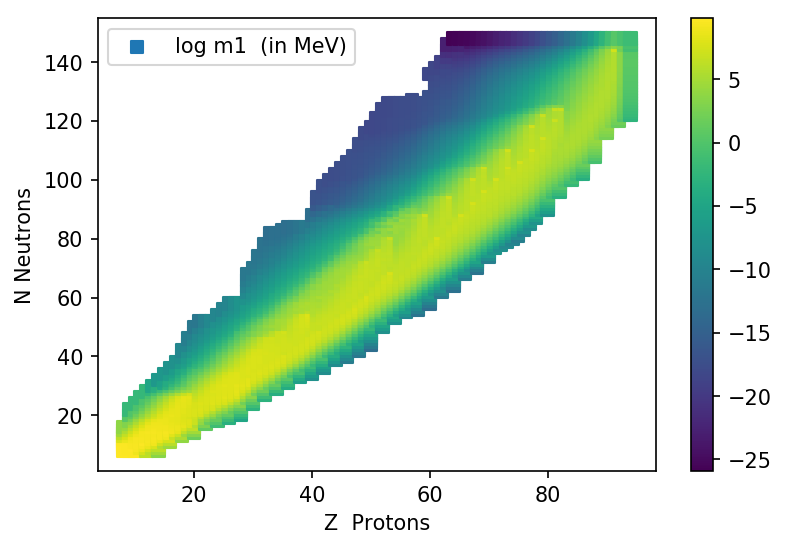

In [14]:
plot_nuclear(isotopes,'m1')

**Question**: What can you say about the most impactful measurements?

Another metric as mentioned in the paper is the KL Divergence https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence

For probability distributions P and Q for a random variable, the KL Divergence is given by 

$$D_{KL} (P || Q) = \int_{-\infty}^{\infty} p(x) log(\frac{p(x)}{q(x)})dx$$

This is the distance between two distributions, that also represents the information gain in a particular measurement. If both P and Q are Gaussian distributions with means and standard deviations $\mu_1, \sigma_1$ and $\mu_2, \sigma_2$, respectively, the KL divergence is simplified as -

$$D_{KL} (P || Q) = log(\frac{\sigma_2}{\sigma_1}) + \frac{\sigma_{1}^{2} + (\mu_1 - \mu_2)^2}{2 \sigma_{2}^{2}} - \frac{1}{2}$$


In [15]:
def kl_divergence(mu1,sigma1,mu2,sigma2):
    return np.log(sigma2/sigma1) + (sigma1**2 + (mu1-mu2)**2)/(2*sigma2**2) - 0.5

In [16]:
isotopes['KL'] = kl_divergence(isotopes['BE'],isotopes['BE_sd'],isotopes['BE'],isotopes['expt_sd'])

In [17]:
isotopes.sort_values(by='KL',ascending=False).head(10)

,Z,N,BE,BE_sd,rate,dm_m_sys,dm_m_stat,dm_m_total,expt_sd,m1,KL
2,8,10,141.130287,3.120406,3.320000e+14,1.000000e-08,1.735525e-10,1.000151e-08,0.000168,18614.617070,1.732520e+08
0,8,8,126.730264,2.684685,3.320000e+14,1.000000e-08,1.735525e-10,1.000151e-08,0.000149,18020.206499,1.623639e+08
1,8,9,131.736614,2.781418,6.280000e+12,1.000000e-08,1.261886e-09,1.007930e-08,0.000160,17431.744191,1.519328e+08
9,9,8,128.192964,2.839719,1.580000e+12,1.000000e-08,2.515773e-09,1.031160e-08,0.000163,17393.728578,1.512709e+08
24,10,10,157.794528,3.125579,2.750000e+14,1.000000e-08,1.906925e-10,1.000182e-08,0.000186,16782.588187,1.408276e+08
3,8,11,145.124246,3.165602,6.700000e+11,1.000000e-08,3.863337e-09,1.072033e-08,0.000190,16686.570787,1.392208e+08
10,9,9,135.628717,2.691217,4.730000e+12,1.000000e-08,1.454017e-09,1.010516e-08,0.000169,15885.654896,1.261770e+08
22,10,8,133.936730,3.075146,2.550000e+11,1.000000e-08,6.262243e-09,1.179897e-08,0.000198,15545.715595,1.208346e+08
11,9,10,146.988864,2.776319,3.710000e+12,1.000000e-08,1.641773e-09,1.013387e-08,0.000179,15484.250247,1.198810e+08
13,9,12,162.992259,3.034940,1.660000e+12,1.000000e-08,2.454403e-09,1.029680e-08,0.000201,15071.724427,1.135784e+08


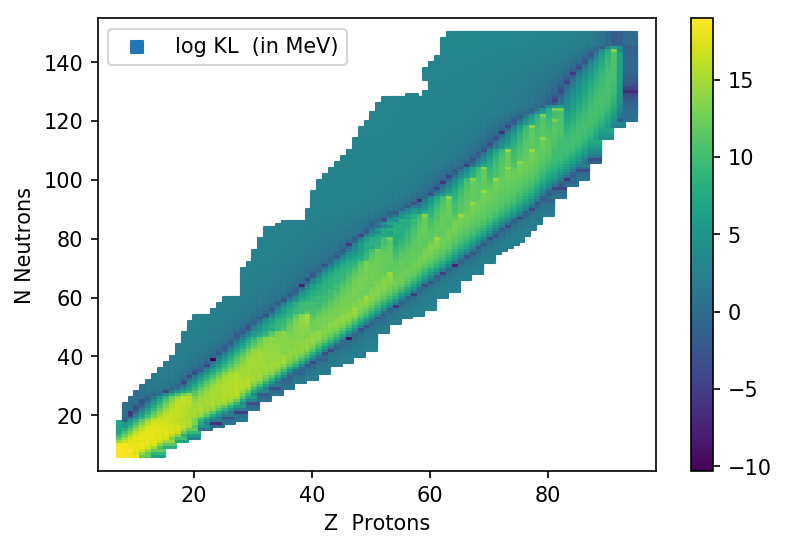

In [18]:
plot_nuclear(isotopes,'KL')

**Questions**:
- Does your list of isotopes to be measured make sense? Why or why not? What assumptions did we make along the way which could lead to potential pitfalls?
HINT - Think about the theoretical uncertainties of the isotopes on your list. Do they make sense?
- What is special so about the yellowish region in the KL Divergence plot? HINT - Think about the balance between experimental and theoretical uncertainties. 

**Additional Challenges**:
- The analysis so far assumed that the measured mass of the nucleus will stay the same as theoretical predictions and only the uncertainty will be improved. However, the experimentally measured mass is a random variable with a Gaussian distribution of theoretical predictions. 

Task - Get a probability distribution for KL divergence for new mass measurements. Does this change your conclusions?